# Information Criterion<br><sub>and Model Selection continued</sub>


### Mixture Models

Again...

$$\scriptsize
\begin{align*}
x_i \sim {} & \sum_{k=1}^K \mathbf{v}_{ik} \mathcal N (\mu_k,\sigma_k^2) & \mu_k \sim {} & \mathcal N (\mu_{k0},\sigma_{k0}^2) \quad \sigma_k^2 \sim \text{Inverse-Gamma} (\alpha_{k0}, \beta_{k0})\\
\overset{\overset{\text{multinomial}}{\mathbf{v}_i\,\sim\,\text{MN}}(\mathbf{p}, \,n=1)}{\Pr(\mathbf{v}_i|E[\mathbf{v}_i]=\mathbf{p}, n=1)} = {}& \frac{n!}{v_1!\cdots v_K!} p_1^{\mathbf{v}_{i1}} \cdots p_K^{\mathbf{v}_{iK}}  & \sum_{j=1}^n \mathbf{v}_{ik} = {}& 1 \quad \mathbf{v}_{ik} \in \{0,1\} \quad \text{latent (unknown) subpulation membership $\textbf{v}$} \\
\underset{\text{Dirichlet}}{\overset{p\,\sim\,\text{Dir}(\boldsymbol \alpha)}{p\left(\mathbf{p}|\boldsymbol \alpha \right)}} = {}& {\frac {1}{\mathrm {B} ({\boldsymbol {\alpha }})}}\prod _{k=1}^{K}p_{k}^{\alpha _{k}-1} & \sum_{j=1}^np_k = {}& 1 \quad {\displaystyle \mathrm {B} ({\boldsymbol {\alpha }})= \prod \limits _{k=1}^{K}\Gamma (\alpha _{k}) \bigg/ \Gamma \left(\sum \limits _{k=1}^{K}\alpha _{k}\right)} \quad E[p_k] = \alpha_k\bigg/\sum_{k=1}^K \alpha_k
\end{align*}$$

$$\scriptsize
\begin{align*}
p(\mu_k | -) \propto {} & \mathcal N (\mu_k| \mu_{k0},\sigma_{k0}^2) \prod_{i=1}^n \sum_{k=1}^K\mathbf{v}_{ik} \mathcal N (x_i | \mu_k,\sigma_k^2) & p(\sigma_k^2 | -) \propto {} & \underset{\text{Inverse-Gamma}}{\text{IG} (\sigma_k^2|\alpha_{k0}, \beta_{k0})} \prod_{i=1}^n \sum_{k=1}^K\mathbf{v}_{ik} \mathcal N (x_i|\mu_k,\sigma_k^2)
\end{align*}$$$$\scriptsize
\begin{align*}
\Pr(\mathbf{v}_{ik}=1|-) \propto {} & p_1^{\mathbf{v}_{i1}} \cdots p_K^{\mathbf{v}_{iK}} \sum_{k=1}^K\mathbf{v}_{ik} \mathcal N (x_i | \mu_k,\sigma_k^2) & p(\mathbf{p}| - ) \propto {}& \prod _{k=1}^{K}p_{k}^{\alpha _{k}-1} \prod_{i=1}^{n} p_1^{\mathbf{v}_{i1}} \cdots p_K^{\mathbf{v}_{iK}}
\end{align*}$$

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

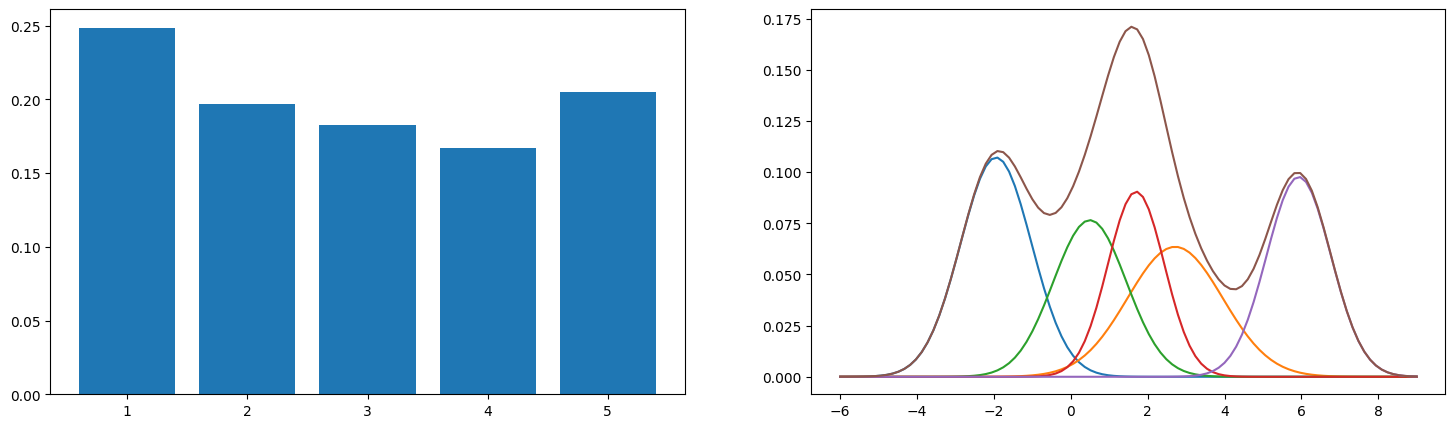

In [2]:
np.random.seed(9)

k = 5
alpha = [2]*k
p_true = stats.dirichlet(alpha).rvs(1)[0] # p_true.sum() # 1

mu_k_true = stats.norm(0,3).rvs(k)
support = np.linspace(-6,9,100)
population_pdf = 0*support
sigma2_k_true = stats.halfnorm().rvs(k)

fig,ax = plt.subplots(1,2,figsize=(18,5))
ax[0].bar(x=np.linspace(1,5,5), height=p_true)
for j in range(k):
    subpopulation_pdf = p_true[j]*stats.norm(mu_k_true[j],sigma2_k_true[j]**0.5).pdf(support)
    ax[1].plot(support, subpopulation_pdf); population_pdf += subpopulation_pdf

ax[1].plot(support, population_pdf);

In [3]:
n_ = 1000
v_true = stats.multinomial(n=1,p=p_true).rvs(n_)
v_true[:3,:]

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [4]:
print(mu_k_true)
print((v_true*mu_k_true)[:3,:])
print((v_true*mu_k_true).sum(axis=1)[:3])

[-1.94384238  2.715657    0.49645017  1.70025387  5.93193509]
[[-1.94384238  0.          0.          0.          0.        ]
 [-1.94384238  0.          0.          0.          0.        ]
 [-0.          0.          0.49645017  0.          0.        ]]
[-1.94384238 -1.94384238  0.49645017]


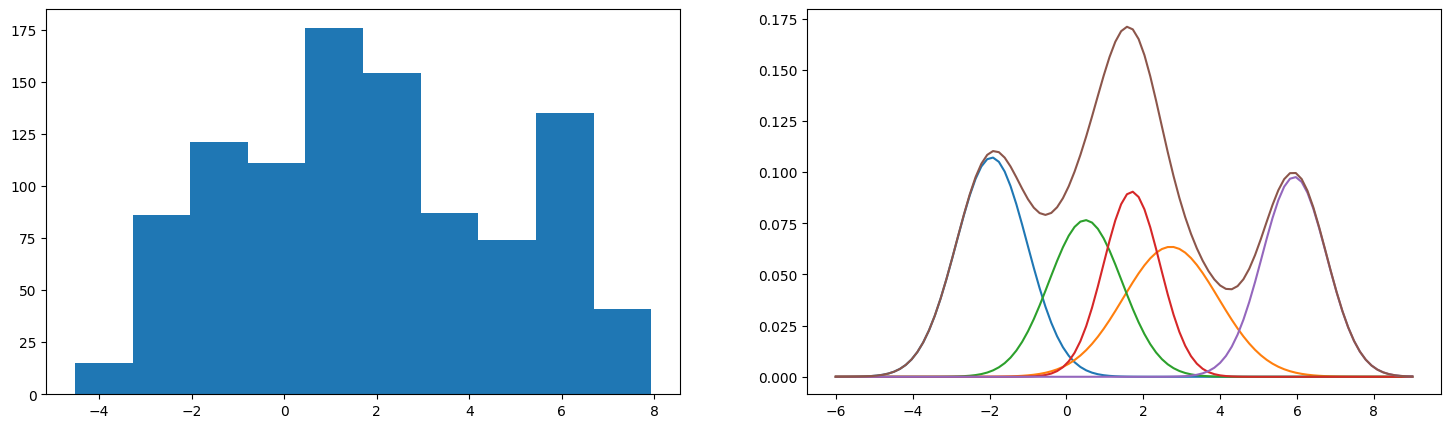

In [5]:
x_ = stats.norm((v_true*mu_k_true).sum(axis=1), (v_true*sigma2_k_true).sum(axis=1)**0.5).rvs()
ax[0].hist(x_)
fig

## Back to Model Selection

### LRT

The **(nested) log likelihood ratio test (LRT) statistic** is $\quad2\log\left(\frac{p(y|\hat \theta_{M_1})}{p(y|\hat \theta_{M_0)}}\right) = \color{gray}{2(\log(p(y|\hat \theta_{M_1})) - \log(p(y|\hat \theta_{M_0})))} $

and has an asymptotically $\;\chi^2_{df}\;$ distribution with **expected value** [equal](https://en.wikipedia.org/wiki/Likelihood-ratio_test) **degrees of freedom**  $\dim(\theta_{M_1})-\dim(\theta_{M_0})$

$$2\log\left(\frac{p(y|X_{n\times p}\hat \beta)}{p(y|\bar y)}\right)\quad \text{is asymptotically} \;\;\chi^2_{p-1}\;\;\text{and a large LRT statistic rejects $M_0$ in favor of $M_1$} $$

> #### Sketch of Some "Intuition" as to Why this is so
>
> - $p(y|\hat \theta_{M})$ is assymptotically normal
> - $\frac{p(y|\hat \theta_{M_1})}{p(y|\hat \theta_{M_0})}$ cancels normalizing constants
> - $\log p(y|\hat \theta_{M})$ after canceling normalizing constants, and since one parameter $\theta_i$ perfectly predicts one $\theta_i=y_i$, is $-\frac{1}{2}\sum_{i=1}^{n-\text{dim}(M)+1} \frac{(y_i-\bar y)^2}{\sigma^2} -\frac{1}{2}\sum_{i=1}^{\text{dim}(M)-1} \frac{(y_j-y_j)^2}{\sigma^2}$
> - $E[\frac{(y_i-\bar y)^2}{\sigma^2}] = 1$ so the $-\frac{1}{2}$ term makes difference $\text{dim}(M)-1$ and cancels the scaling $2$

### Deviance  and "Bayesian" Model Size

Model **deviance** is $\quad D(\theta) = 2(\underset{\text{a constant}}{\overset{\text{saturated model}}{\log(p(y|y))}} - \overset{\text{actual model}}{\log(p(y|\theta)})) \color{gray}{= 2\log\left(\frac{p(y|y)}{p(y|\theta)}\right)} \geq 0 \quad$ (scaled by $2$ [to match the LR](https://stats.stackexchange.com/qu,estions/379810/why-is-the-deviance-defined-with-a-factor-2-or-likelihood-ratio-squared))

The [Bayesian characterization](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=d78ad2497639bff740d0c1181c35263d2630b172)
 of the **effective number of parameters** in a model is

$$p_D = {\overline{D(\theta)} - D(\bar{\theta})} \color{gray}{= 2(\log(p(y|\bar{\theta})) - \overline{\log(p(y|\theta))}) \underset{\text{usually}}{\geq 0}} \quad \text{ or } \quad \underset{\text{not typically preferred as it's less stable}}{p_D = 2\text{Var}_{p(\theta|y)}[\log(p(y|\theta))]}$$

because (for fixed models such as ["linear models with uniform prior distributions"](http://www.stat.columbia.edu/~gelman/research/published/waic_understand3.pdf) and large $n$) both versions of $p_D$ estimate the degrees of freedom parameter of the asymptotic $\chi^2_{\text{df}}$ of $\log(p(y|\theta))$ which is the number of parameters $p(y|\theta)$.

> #### Sketch of the "Proof" as to Why this is so
>
> $-2\log(p(y|\bar{\theta})$ for linear regression is the expected standardized residual sum of squares
>
> $\begin{align*}
(y-\hat y)^T(y-\hat y)/\sigma^2 &={} y^T(I-H)^T(I-H)y/\sigma^2
= y^T(I-H)(I-H)y/\sigma^2
= y^T(I-H)y/\sigma^2 \\
&={} (X\beta + \epsilon)^T(I-H)(X\beta + \epsilon)/\sigma^2
= \epsilon^T(I-H)\epsilon/\sigma^2 = \text{trace}(\epsilon^T(I-H)\epsilon/\sigma^2)\\
&={} \text{trace}((I-H)\epsilon\epsilon^T/\sigma^2) = \text{trace}((I-H)\epsilon\epsilon^T/\sigma^2) \\
\text{with expected value} & \quad \; \text{trace}((I-H)\sigma^2I/\sigma^2) = \text{trace}(I-H) = n - \text{trace}(H)\\
&={} n - \text{trace}(X^T(X^TX)^{-1}X) = n - \text{trace}((X^TX)^{-1}XX^T) = n - \text{trace}(I_{p \times p})\\
&={} n - p
\end{align*}$
>
> while $-2\overline{\log(p(y|\theta))}$ does something like reflect the variability of $n-p$ unexplained data points plus the variability of $p$ parameters
> $E_{\hat y}[\sum_{i=1}^n \frac{(y_i - \hat y_i)^2}{\sigma^2} ] \overset{\text{if unbiased}}{\approx} E_{\hat y}[\sum_{i=1}^n \frac{(y_i - E[y_i])^2}{\sigma^2} ]$ which has an expected value (with respect to $y$) of $n$.

### Information Criterion

**Information Criterion** criterion refer to the fact that each additional parameter is expected to decrease $-2\log f(y | \theta)$ by $1$ unit, where a lower negative loglikelihood is "better".

Rearranging $\;\;p_D = {\overline{D(\theta)} - D(\bar{\theta})}\;\;$ in terms of **posterior mean deviance** $\;\;\overline{D(\theta)} = D(\bar{\theta}) + p_D\;\;$ leads to the ["adequacy" "measure of fit plus complexity"](https://fisher.stats.uwo.ca/faculty/aim/2015/9938/articles/SpiegelhalterJRSSB2002.pdf) **deviance information criterion** in the standard **information criterion form**

\begin{align*}
\text{DIC:} \;{}& -2\log(p(y|\bar{\theta})) + 2p_D \quad\;\;\text{since} \quad \overline{D(\theta)}+p_D = D(\bar{\theta}) + 2p_D \quad \text{$p(y|y)$'s cancel in DIC$_{M_1}$-DIC$_{M_0}$}\\
\text{AIC:} \;{}& -2\log(p(y|\hat{\theta})) + 2p \quad\quad\, \text{and $\quad e^{(\text{AIC$_{M_0}$-AIC$_{M_1}$})/2}\quad$ is an unnested version of the }\textbf{LRT statistic}\\
\text{BIC:} \;{}& -2\log(p(y|\hat{\theta})) + p\ln(n) \;\;\, \text{which approximates }\textbf{Bayes Factor} K = \frac{p(\mathbf{x}|M_1)}{p(\mathbf{x}|M_0)} \approx e^{(BIC_{M_0}-BIC_{M_1})/2}
\end{align*}

### Out of sample predictive performance

Recall that **Bayes factors** induce an **Occam's razor** (parameter integration dimension) penalization for model complexity; whereas, **DIC** and [**AIC**](https://stats.stackexchange.com/questions/116935/comparing-non-nested-models-with-aic) measure ["out-of-sample-prediction error using a bias-corrected adjustment of within-sample error"](http://www.stat.columbia.edu/~gelman/research/published/waic_understand3.pdf)

Even though the **Bayesian Occam's razor** (with **Bayes factors**) naturally favoring parsimony in model selection is intuitively attractive, this "simplest solution is the best solution" perspective is not necessarily always justified.

- It is still reasonable to prefer more complex models with improved out of sample performance

**Machine learning $K$-folds cross-validation parameter tuning** optimizes the *bias-variance tradeoff** in a model fit which allows the model to be both underfit and overfit in different areas of the prediction space and so improves the overall out of sample predictive accuracy by reducing bias in critical areas while inducing minimal "collatoral damage" from overfitting in other areas.

- **Bayesian Occam's razor** (with **Bayes factors**) does not attempt to optimize the **bias-variance tradeoff** in this "overfitting" manner; rather, it penalizes "prior misspecifications" that are increasingly unavoidable in higher dimensions and can rapidly overwhelm the potential beneficial increases in model flexibility observable in the likelihood.


### Widely Applicable Information Criterion (WAIC)<br> and Leave-One-Out Cross Validation (LOO-CV)

- ***BIC:*** $\;-2\log(p(y|\hat{\theta})) + p \ln(n)\;$ is based on approximating ***Bayes factors***
    - but it's not actualy a **Bayesian** method since it doesn't integrate over the **posterior uncertainty**
- **DIC:** $\;-2\log(p(y|\bar{\theta})) + 2p_D\;$ is similarly not **fully Bayesian**
    - since $p_D \color{gray}{= {\overline{D(\theta)} - D(\bar{\theta})}} = \color{navy}{2(\log(p(y|\bar{\theta})) - \overline{\log(p(y|\theta))})}$
    - **conditions** on the **posterior mean** $\bar{\theta}$ rather than integrating over the **posterior uncertainty**(!)
    - The alternative $\color{purple}{\;p_D = 2\text{Var}_{p(\theta|y)}[\log(p(y|\theta))]\;}$ was unstable but it was **fully Bayesian**...

**WAIC** uses the **log pointwise predictive density** $llpd = \log\left(\prod_{i=1}^n p(y_i|\theta)\right)$ to estimate **effective model size** as

$$\color{purple}{\;p_{\text{WAIC2}} = \sum_{i=1}^n\text{Var}_{p(\theta|y)}[\log(p(y_i|\theta))]\quad \color{gray}{\text{(although note there's no longer a factor of $2$ [proof not shown])}}}$$
which provide stable estimation, and is preferred over the (also **fully Bayeisan**) $$\;\color{navy}{p_{\text{WAIC1}} = 2\sum_{i=1}^n\left(\log\left( \frac{1}{T}\sum_{t=1}^T p(y_i|\theta^{(t)}) \right) - \frac{1}{T}\sum_{t=1}^T\log(p(y_i|\theta^{(t)}))\right)\;}$$ because $p_{\text{WAIC2}}$ <u>is theoretically and empirically more similar to a **LOO-CV**</u> calculation than $p_{\text{WAIC1}}$ <font style='color:gray'></font>


The above **information criterion** can now be extended with

$\quad\quad\text{WAIC:} \;-2\sum_{i=1}^n\left(\log\overline{p(y_i|\theta)}\right) + 2p_{\text{WAIC2}} =  -2\sum_{i=1}^n\left(\log\left( \frac{1}{T}\sum_{t=1}^T p(y_i|\theta^{(t)}) \right)\right) + 2p_{\text{WAIC2}}$

---

The difference bewteen **WAIC** and **DIC** is that **WAIC** fully integrates over the posterior while **DIC** does not and instead conditions on the **posterior parameter mean**

- They both are "more Bayesian" than the **AIC** in incorporate the **prior** into **effective model size** estimation
- and in the same way both are "more Bayesian" than the **BIC** even though it approximates **Bayes factors**

> <font style='color:navy'>And anyway remember that **BIC** does not estimate ["out-of-sample-prediction error using a bias-corrected adjustment of within-sample error"](http://www.stat.columbia.edu/~gelman/research/published/waic_understand3.pdf)</font>


But ***WAIC*** is just a computationally tractable alternative to  
***bias corrected <u>log pointwise predictive density</u> $lppd$ Leave-One-Out Cross Validation (LOO-CV)***

$$\overset{\text{corrected}}{lppd_{loo-cv}}=\sum_{i=1}^n\log \underbrace{\left(\frac{1}{T}\sum_{t=1}^T p(y_i|\theta^{(t|-i)})\right)}_{\theta^{(t|-i)} \sim p(\theta|y_{-i})} + \underset{\text{due to using $n-1$ not $n$}}{\underbrace{lppd-\overline{lppd^{(-i)}}}_{\text{underestimated accuracy}}}$$

with ***AIC***, ***DIC*** and ***WAIC*** are asymptotically equivalent to ***log pointwise predictive density LOO-CV*** under various conditions...


In [6]:
import pymc as pm
import arviz as az


In [7]:
with pm.Model() as mixture_model:
    w = pm.Dirichlet('w', a=[1]*k)
    v = pm.Categorical('v', p=w, size=n_)
    #v = pm.Multinomial('v', n=1, p=w, size=n_)
    mu = pm.Normal('μ', mu=mu_k_true, sigma=2, size=k)#size=(1,k))
    sigma = pm.HalfNormal('σ', sigma=2, size=k)#size=(1,k))
    pm.Normal('y', mu=mu[v], sigma=sigma[v], observed=x_)
    #pm.Normal('y', mu=(mu*v).sum(axis=1),
    #                   sigma=(sigma**0.5*v).sum(axis=1), observed=x_)
    idata_ = pm.sample()

Output()

ERROR:pymc.stats.convergence:There were 94 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


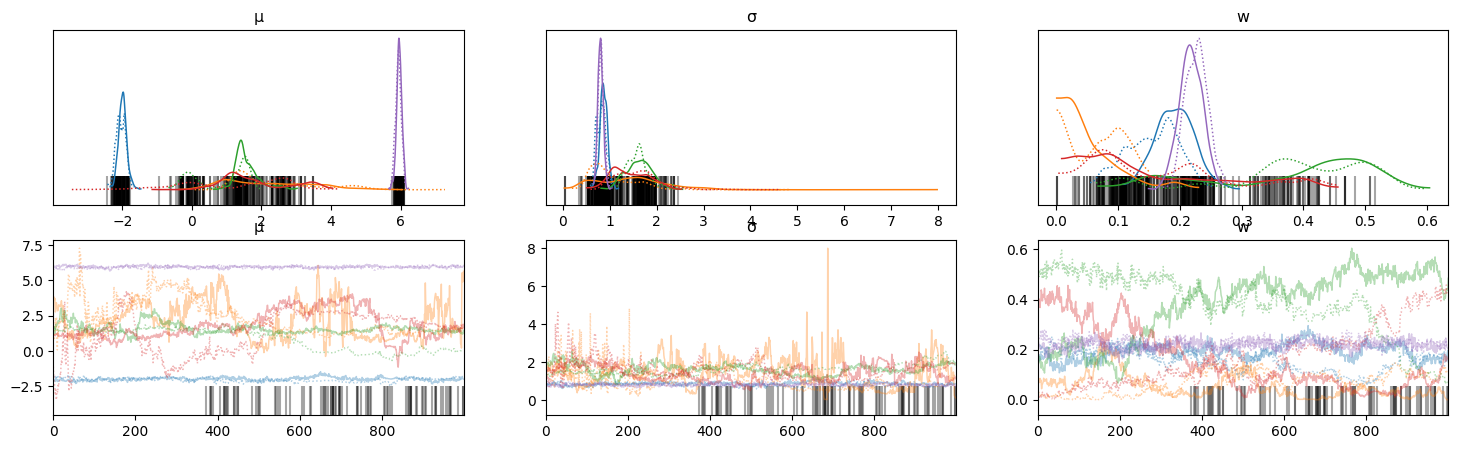

In [8]:
fig,ax = plt.subplots(2,3,figsize=(18,5))
az.plot_trace(idata_, var_names=['μ','σ','w'], axes=ax.T);

In [9]:
k_4 = 4
with pm.Model(coords={"cluster": range(k_4)}) as model_k_4:

    μ = pm.Normal("μ", mu=[-2, 0, 2, 4], sigma=2,
                  transform=pm.distributions.transforms.univariate_ordered,
                  initval=[-2, 0, 2, 4], dims="cluster")
    σ = pm.HalfNormal("σ", sigma=1, dims="cluster")
    weights = pm.Dirichlet("w", 2*np.ones(k_4), dims="cluster")
    pm.NormalMixture("y", w=weights, mu=μ, sigma=σ, observed=x_)

    idata_k_4 = pm.sample()

/usr/local/lib/python3.11/dist-packages/pymc/distributions/transforms.py:53: FutureWarning: univariate_ordered has been deprecated, use ordered instead.
  warnings.warn(f"{name} has been deprecated, use ordered instead.", FutureWarning)


Output()

ERROR:pymc.stats.convergence:There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


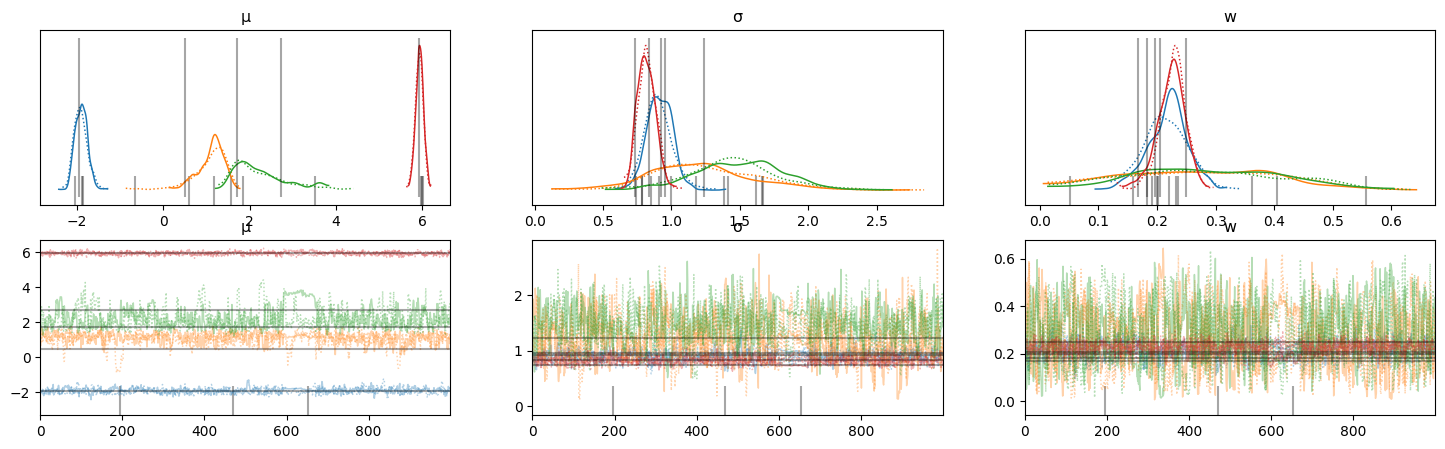

In [10]:
fig,ax = plt.subplots(2,3,figsize=(18,5))
az.plot_trace(idata_k_4, var_names=["μ", "σ", "w"],
                     lines=[("μ", {}, [mu_k_true]),
                            ("σ", {}, [sigma2_k_true**0.5]),
                            ("w", {}, [p_true])], axes=ax.T);

In [11]:
k_3 = 3
with pm.Model(coords={"cluster": range(k_3)}) as model_k_3:

    μ = pm.Normal("μ", mu=[-2, 1, 4], sigma=2,
                  transform=pm.distributions.transforms.univariate_ordered,
                  initval=[-2, 1, 4], dims="cluster")
    σ = pm.HalfNormal("σ", sigma=1, dims="cluster")
    weights = pm.Dirichlet("w", 2*np.ones(k_3), dims="cluster")
    pm.NormalMixture("y", w=weights, mu=μ, sigma=σ, observed=x_)

    idata_k_3 = pm.sample()

/usr/local/lib/python3.11/dist-packages/pymc/distributions/transforms.py:53: FutureWarning: univariate_ordered has been deprecated, use ordered instead.
  warnings.warn(f"{name} has been deprecated, use ordered instead.", FutureWarning)


Output()

In [12]:
k_2 = 2
with pm.Model(coords={"cluster": range(k_2)}) as model_k_2:

    μ = pm.Normal("μ", mu=[-1, 2], sigma=2,
                  transform=pm.distributions.transforms.univariate_ordered,
                  initval=[-1, 2,], dims="cluster")
    σ = pm.HalfNormal("σ", sigma=1, dims="cluster")
    weights = pm.Dirichlet("w", 2*np.ones(k_2), dims="cluster")
    pm.NormalMixture("y", w=weights, mu=μ, sigma=σ, observed=x_)

    idata_k_2 = pm.sample()

/usr/local/lib/python3.11/dist-packages/pymc/distributions/transforms.py:53: FutureWarning: univariate_ordered has been deprecated, use ordered instead.
  warnings.warn(f"{name} has been deprecated, use ordered instead.", FutureWarning)


Output()

In [13]:
k_5 = 5

with pm.Model(coords={"cluster": range(k_5)}) as model_k_5:

    μ = pm.Normal("μ", mu=mu_k_true[np.argsort(mu_k_true)], sigma=2,
                  transform=pm.distributions.transforms.univariate_ordered,
                  initval=mu_k_true[np.argsort(mu_k_true)], dims="cluster")
    σ = pm.HalfNormal("σ", sigma=2, dims="cluster")
    weights = pm.Dirichlet("w", np.ones(k_5), dims="cluster")
    pm.NormalMixture("y", w=weights, mu=μ, sigma=σ, observed=x_)

    idata_k_5 = pm.sample()

/usr/local/lib/python3.11/dist-packages/pymc/distributions/transforms.py:53: FutureWarning: univariate_ordered has been deprecated, use ordered instead.
  warnings.warn(f"{name} has been deprecated, use ordered instead.", FutureWarning)


Output()

ERROR:pymc.stats.convergence:There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


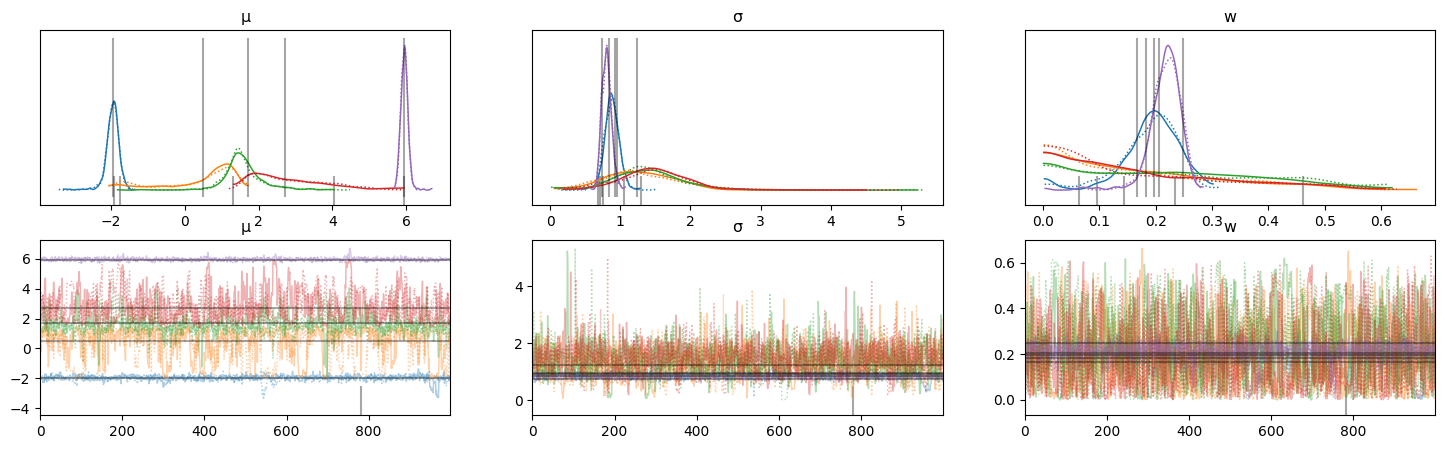

In [14]:
fig,ax = plt.subplots(2,3,figsize=(18,5))
az.plot_trace(idata_k_5, var_names=["μ", "σ", "w"],
                     lines=[("μ", {}, [mu_k_true]),
                            ("σ", {}, [sigma2_k_true**0.5]),
                            ("w", {}, [p_true])], axes=ax.T);

In [17]:

# with mixture_model:
#     pm.compute_log_likelihood(idata_)
#     # or pass `idata_kwargs={"log_likelihood": True}` to `pm.sample`
# with model_k_4:
#     pm.compute_log_likelihood(idata_k_4)
# with model_k_3:
#     pm.compute_log_likelihood(idata_k_3)
# with model_k_2:
#     pm.compute_log_likelihood(idata_k_2)
# with model_k_5:
#     pm.compute_log_likelihood(idata_k_5)


In [19]:
# #az.loo(trace_p); az.loo(trace_h_nc); az.waic(trace_p); az.waic(trace_h_nc)
# az.compare({"5 components v2": idata_k_5,
#             "5 components": idata_,
#             "4 components": idata_k_4,
#             "3 components": idata_k_3,
#             "2 components": idata_k_2}, ic='loo')#ic='waic')


In [21]:
# # https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/model_comparison.html
# az.compare({"5 components v2": idata_k_5,
#             "5 components": idata_,
#             "4 components": idata_k_4,
#             "3 components": idata_k_3,
#             "2 components": idata_k_2}, ic='waic')#ic='loo')



In [22]:
# az.plot_compare(az.compare({"5 components": idata_,
#                             "4 components": idata_k_4,
#                             "3 components": idata_k_3,
#                             "2 components": idata_k_2,
#                             "5 components v2": idata_k_5}), insample_dev=False);

## Posterior Predictive Distributions
- https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/posterior_predictive.html

Output()

(0.0, 0.25)

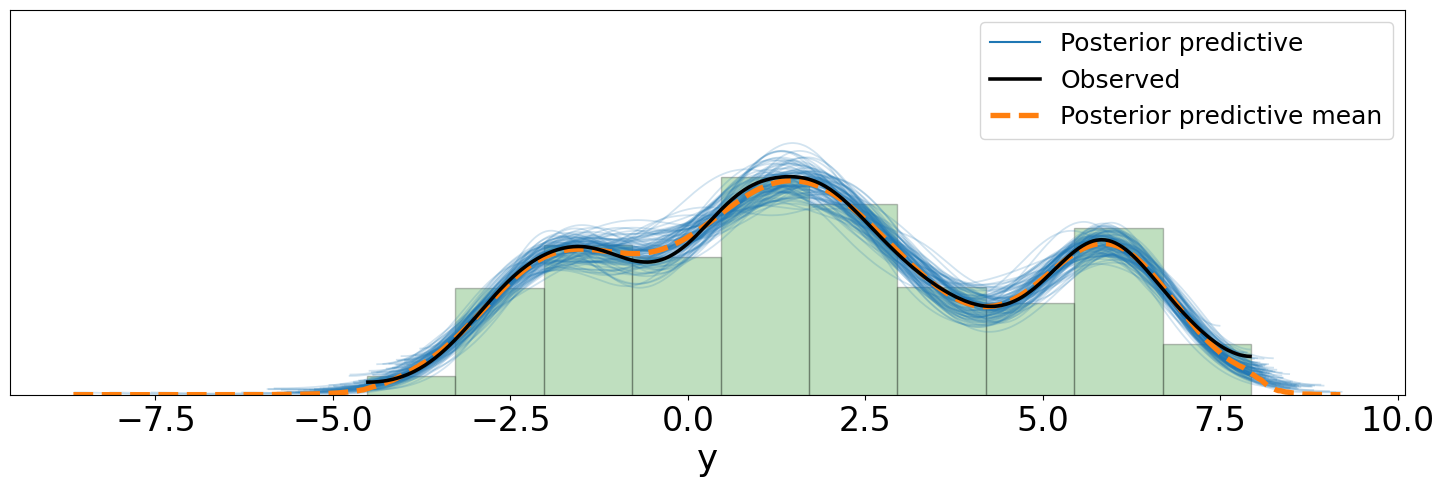

In [23]:
with mixture_model:
    pm.sample_posterior_predictive(idata_, extend_inferencedata=True)

fig = az.plot_ppc(idata_, num_pp_samples=100, figsize=(18,5))
fig.hist(x_, density=True, color='green', edgecolor='black', alpha=0.25)
fig.set_ylim([0,.25])

In [28]:
# plt.figure(figsize=(18,5))
# ave_mixture=0*support
# reps=1000
# for j in range(reps):

#     chain,draw=np.random.choice([0,1,2,3]),np.random.choice(np.linspace(0,999,1000,dtype=int))

#     mixture = stats.norm(idata_.posterior['μ'][chain,draw],
#                          idata_.posterior['σ'][chain,draw]).pdf(np.array([support]*5).reshape(5,100).T)
#     mixture = (mixture*idata_.posterior['w'][chain,draw].values).sum(axis=1)

#     plt.plot(support, mixture, c='gray', alpha=0.01); ave_mixture += mixture/reps
# plt.plot(support, ave_mixture, 'k', lw=2)
# plt.hist(x_, density=True, color='green', edgecolor='black', alpha=0.25);

In [30]:
# with model_k5:
#     pm.sample_posterior_predictive(idata_k_5, extend_inferencedata=True)

# fig = az.plot_ppc(idata_k_5, num_pp_samples=100, figsize=(18,5))
# fig.hist(x_, density=True, color='green', edgecolor='black', alpha=0.25)
# fig.set_ylim([0,.25])

In [32]:
# with model_k3:
#     pm.sample_posterior_predictive(idata_k_3, extend_inferencedata=True)

# fig = az.plot_ppc(idata_k_3, num_pp_samples=100, figsize=(18,5))
# fig.hist(x_, density=True, color='green', edgecolor='black', alpha=0.25)
# fig.set_ylim([0,.25])

## Dirichlet Processes: a distribution of distributions

For any  partition of support $S = \cup_{i=1}^k S_i$
the distribution $p$ is distributed according to the **Dirichlet process**

$$\overset{\text{Dirichlet Process}}{p \sim \text{DP}(\alpha, p_0)}\quad \text{ if }\quad\left(p(S_1),\cdots,p(S_k)\right) \sim \text{Dirichlet}\left(\alpha p_0(S_1),\cdots,\alpha p_0(S_k)\right)$$

- where $p(S_j) = \int_{S_j}p(x)dx = \int 1_x(S_j) p(x)dx \approx p_0(S_j) = \int_{S_j}p_0(x)dx = \int 1_x(S_j) p_0(x)dx$
- and the larger $\alpha$ is the closer the approximation the sampled distribution $p$ is to the **base distribution** $p_0$

For ${x}_i \sim p$ the **posterior distribution**

$$p | \mathbf{x} \sim \text{DP}\left(\alpha+n, \frac{\alpha}{\alpha+n}p_0 + \frac{\sum_{i=1}^n 1_{x_i}}{\alpha+n} \right)\quad\text{ with }\quad \underset{\text{function}}{\overset{\text{indicator}}{1_{x_i}(S)}} = \begin{cases}1:&\text{if  }{x}_{i} \in S\\0:&\text{otherwise}\end{cases}$$

$\displaystyle\text{Letting } \; p = \sum_{i=1}^\infty w_i 1_{y_i} \; \text{ where } \; y_i \sim  p_0 \; \text{ and }\textbf{weights } \; \sum_{i=1}^\infty \underset{w_i>0}{w_i} = 1 \; \text{ are the }\textbf{stick-breaking process}$
$$\textstyle w_1 = \beta_1 \;\text{ and }\; \underset{\text{for $j>1$}}{w_j =} \beta_j \underbrace{\prod_{i=1}^{j-1}(1-\beta_i)}_{\text{stick length at $j-1$}} \; \text{ for }\; \underset{E[\beta_i]= 1/(1+\alpha) \color{gray}{= \alpha/(\alpha+\beta)}}{\beta_i \sim \text{Beta}(\color{gray}{\alpha\text{ [for  }}}\color{gray}{\text{Beta]}}=1,\beta=\alpha \color{gray}{\text{ [from DP]}})$$

$\text{actualizes } \; p \sim \text{DP}(\alpha,   p_0) \; \text{ so } \;  \left(\sum_{i=1}^\infty w_i 1_{{y}_{i}}(S_1),\cdots,\sum_{i=1}^\infty w_i 1_{{y}_{i}}(S_k)\right) \sim \text{Dirichlet}\left(\alpha   p_0(S_1),\cdots,\alpha   p_0(S_k)\right)$



https://www.pymc.io/projects/examples/en/latest/mixture_models/dp_mix.html

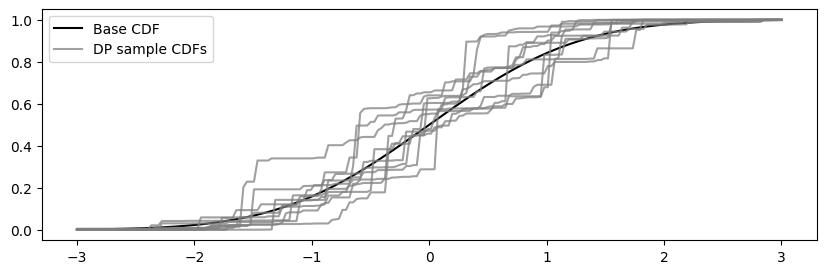

In [33]:
alpha=10
support=np.linspace(-3, 3, 200)
p0=stats.norm # could be a posterior mixed p0 + discrete point mass posterior

n=10
k=alpha*100

beta = stats.beta.rvs(1, alpha, size=(n,k))
w = np.zeros(beta.shape)
w[:, 0] = beta[:,0]
w[:,1:] = beta[:,1:] * (1-beta[:,:-1]).cumprod(axis=1)

y = p0.rvs(size=(n,k))

plt.figure(figsize=(10,3))
plt.plot(support, p0.cdf(support), c="k", label="Base CDF")
sample_cdfs = (w[..., np.newaxis] * np.less.outer(y, support)).sum(axis=1)
plt.plot(support, sample_cdfs[0], c="gray", alpha=0.75, label="DP sample CDFs")
plt.plot(support, sample_cdfs[1:].T, c="gray", alpha=0.75)
plt.legend();

## Dirichlet Process Mixtures: Nonparametric Density Estimation  

https://www.pymc.io/projects/examples/en/latest/mixture_models/dp_mix.html#dirichlet-process-mixtures

$$
\begin{align*}
x_i \sim f_{\theta_i} &\equiv{} \mathcal N(\theta_i, \sigma=0.3) = \int \mathcal N(\theta_i, \sigma=0.3) d\theta_i = \sum_{j=1}^\infty w_j \mathcal N(y_j, \sigma=0.3) \\
\theta_i \sim p &\equiv{} DP(\underset{2 \;\; \mathcal N(0,1)}{\alpha,\;\;\; p_0)}  \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad \textstyle \approx \sum_{j=1}^n w_j \mathcal N(y_j, \sigma=0.3) \\
p &={} \textstyle \sum_{j=1}^\infty w_j 1_{y_j}\\
y_j &\sim{} \mathcal N(0,1) \\
w_j &={} \beta_j  \textstyle \prod_{k=1}^{j-1}(1-\beta_k)\\
\beta_j &\sim{} \text{Beta}(\color{gray}{\alpha\text{ [for Beta]}}=1,\beta=\alpha=2\color{gray}{\text{ [from DP]}})
\end{align*}$$





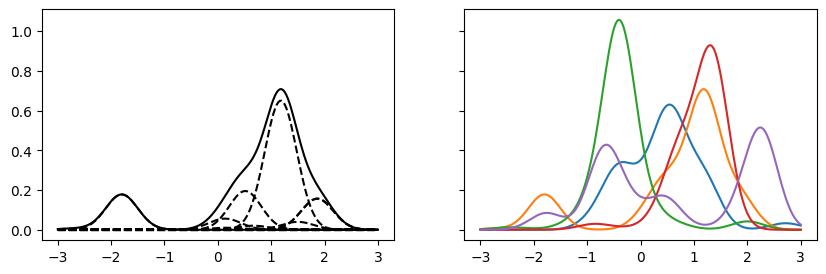

In [34]:
n,k = 5,30
alpha = 2
p0 = stats.norm
f = lambda x,theta: stats.norm(theta, 0.3).pdf(x)

beta = stats.beta.rvs(1, alpha, size=(n,k))
w = np.zeros(beta.shape)
w[:,0] = beta[:,0]
w[:,1:] = beta[:,1:]*(1-beta[:,:-1]).cumprod(axis=1)
theta = p0.rvs(size=(n,k))

dpm_pdf_components = f(support, theta[..., np.newaxis])
dpm_pdfs = (w[..., np.newaxis] * dpm_pdf_components).sum(axis=1)
fig,ax=plt.subplots(1,2,figsize=(10, 3),sharey=True)
ix = 1
ax[0].plot(support, dpm_pdfs[ix], c="k", label="Density")
ax[0].plot(support, (w[..., np.newaxis] * dpm_pdf_components)[ix, 0],"--", c="k", label="Mixture components (weighted)",)
ax[0].plot(support, (w[..., np.newaxis] * dpm_pdf_components)[ix].T, "--", c="k")
ax[1].plot(support, dpm_pdfs.T);

## (Truncated) Dirichlet Process Mixture Models:<br>Nonparametric Density Estimation

$$
\begin{align*}
x_i \sim {}&  \sum_{j=1}^k w_j \mathcal N (\mu_j, \tau_j) & \mu_j \sim {}& \mathcal N (0, \lambda_j) & \tau_j, \lambda_j \sim {}& \text{Gamma}(10,1) \\
w_j ={}&  \beta_j \prod_{i=1}^{j-1} (1-\beta_i) & \beta_j \sim{}& \text{Beta}(1,\alpha) &  \alpha \sim {}& \text{Gamma}(1,1)
\end{align*}$$

In [35]:
import pytensor.tensor as pt

def stick_breaking(beta):
    portion_remaining = pt.concatenate([[1], pt.extra_ops.cumprod(1 - beta)[:-1]])
    return beta * portion_remaining

k = 30
with pm.Model(coords={"component": np.arange(k), "obs_id": np.arange(n_)}) as model:
    alpha = pm.Gamma("alpha", 1.0, 1.0);
    beta = pm.Beta("beta", 1.0, alpha, dims="component")
    w = pm.Deterministic("w", stick_breaking(beta), dims="component")
    tau = pm.Gamma("tau", 1.0, 1.0, dims="component")
    lambda_ = pm.Gamma("lambda_", 10.0, 1.0, dims="component")
    mu = pm.Normal("mu", 0, tau=lambda_ * tau,
                   #transform=pm.distributions.transforms.univariate_ordered,
                   dims="component")
    obs = pm.NormalMixture("obs", w, mu, tau=lambda_*tau, observed=x_, dims="obs_id")

    trace = pm.sample(tune=5000, init="advi", target_accept=0.95)


Output()

Output()

ValueError: Not enough samples to build a trace.

NameError: name 'trace' is not defined

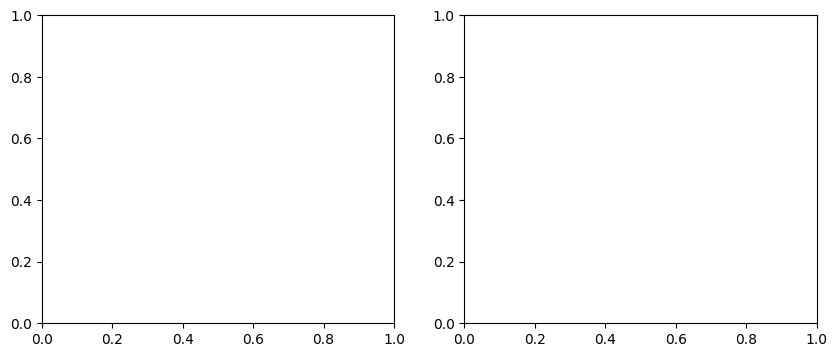

In [36]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
support = np.linspace(-6,9,100)
ave_mixture=0*support
reps=1000
for j in range(reps):

    chain = np.random.choice([0,1,2,3])
    draw = np.random.choice(np.linspace(0,999,1000,dtype=int))
    mixture = stats.norm(trace.posterior['mu'][chain,draw],
                         (trace.posterior['tau'][chain,draw]*\
                          trace.posterior['lambda_'][chain,draw])**-0.5).pdf(np.array([support]*k).reshape(k,100).T)
    mixture = (mixture*trace.posterior['w'][chain,draw].values).sum(axis=1)
    plt.plot(support, mixture, c='gray', alpha=0.01)
    ave_mixture += mixture/reps

ax[0].bar(x=np.linspace(1,k,k), height=trace.posterior['w'].mean(("chain", "draw")))
ax[1].plot(support, ave_mixture, 'k', lw=2)
ax[1].hist(x_, density=True, color='green', edgecolor='black', alpha=0.25, bins=30);


In [ ]:
az.plot_trace(trace, var_names=["alpha"]);


In [ ]:
{'component':model.coords['component'][:5]}

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(18,5))
az.plot_trace(trace, var_names=["mu", "w"], #  "tau",
              coords={'component': list(model.coords['component'][:5])},
                     lines=[("mu", {}, [mu_k_true]),
                            ("tau", {}, [1/sigma2_k_true]),
                            ("w", {}, [p_true])], axes=ax.T)
plt.tight_layout();

In [ ]:
with model:
    pm.compute_log_likelihood(trace)

#display(az.loo(trace))
#display(az.waic(trace))


In [ ]:
az.plot_compare(az.compare({"DPM": trace,
                            #"5 components": idata_,
                            "4 components": idata_k_4,
                            "3 components": idata_k_3,
                            "2 components": idata_k_2,
                            "5 components v2": idata_k_5}), insample_dev=False);

In [ ]:
az.compare({#"DPM": trace,
            #"5 components": idata_,
            "4 components": idata_k_4,
            "3 components": idata_k_3,
            #"2 components": idata_k_2,
            #"5 components v2": idata_k_5
           })

## Bayes beats Overfitting not caused by Inductive Bias

**Machine learning** is concerned with the **underfitting (bias) - overfitting (variance)** spectrum affecting $p( y|\hat \theta)$ due to<br><br>(a)$\;\;$ mispecification of $p(y|\theta)\quad$ and subsequent $\quad$(b)$\;\;$  ***conditioning*** on a data set specific MLE $\hat \theta$ estimation

Using $p(y|\theta^{MAP})$ similarly risks **overfitting** as a result of **conditioning** on $\theta^{MAP} = \underset{\theta}{\text{argmax}} p(\theta|y)$

For prior $p(\theta)$ and exactly correctly specified $p(y|\theta)$ the **overfitting** caused by **conditioning** on a single **optima** can be avoided using

$$\int p(\tilde y|\theta) p(\theta | y) d\theta \overset{\tilde y \perp \!\!\!\perp y |
\theta} = p(\tilde y | y) \quad \color{purple}{\underset{called}{\overset{\text{this is}}{\longleftarrow}} \quad \text{the posterior predictive distribution}}$$

$$\text{so }\quad \overline{p(y_i|\theta)} = \frac{1}{T}\sum_{t=1}^T p(y_i|\theta_t) \approx E_{p(\theta|y)}[p(y_i|\theta)] \quad  \text{ beats } \quad p\left(y_i|\bar \theta = \frac{1}{T}\sum_{t=1}^T \theta^{(t)} \approx E_{p(\theta|y)}[\theta]\right)$$

> and note also ***Bayesian model averaging*** $\quad\sum_{j=1}^k p(\tilde y|M_j) \Pr( M_j |y) $
>
> $$\small \quad\text{with } \quad \Pr( M_j |y) = \frac{\Pr( M_j |y) \Pr( M_j)}{\sum_{j=1}^k \Pr( M_j |y) \Pr( M_j)} \quad \text{ and } \quad \Pr(y | M_j)= \int p(y|\theta_j, M_j)p(\theta_j | M_j)d\theta_j$$


<font style='color:navy'>but the **inductive bias** implicit in the $p(y|\theta)p(\theta)$ specification still causes differential **bias** and **overfitting** in predictions (where the term "differential" indicates that prediction domains can simultaneously entail both **under** and **overfitting**)</font>

<font style='color:gray'>This is reminiscent of ***Bayes optimal classifiers*** $b(x) = \underset{k}{\text{argmax}} \underset{\int p_\theta(\tilde y=k|x) p(\theta) d\theta}{p(\tilde y=k|x)}$ minimizing ***risk*** $\mathcal{R}(g) = Pr(g(x) \neq y_i)$
so $\mathcal{R}(b)\leq\mathcal{R}(f)$ for any decision rule $f$ to the degree that the modeling structure $p_\theta(\tilde y=k|x) p(\theta)$ is correct</font>


## What Bayes Does and Does Not

**Conditional** on the probabilistic modeling specification **Bayesian posterior analysis** provides coherent uncertainty characterizations, <u>but these are still **conditional** on the ***inductive biases*** of the modeling and/or idosyncratic sampling</u>...

$\quad\;\;\bullet\;$ **Bayesian posterior uncertainty** characterizes **information propegation** <u>but not model mispecification</u>

$\quad\;\;\bullet\;$ That's what ~~**Bayes factors**, **DIC**~~, ***WAIC***, and **LOO-CV** are for:<br>$\quad\quad\;$ model comparison and estimation of future **out of sample** performance
      
$\quad\;\;\bullet\;$ Addressing **Inductive Bias** means assessing [**lack of fit**](https://en.wikipedia.org/wiki/Goodness_of_fit) and **influential data point diagnostics**<br>$\quad\quad\;$ and can be formulated in a **pointwise manner** on the basis of the **Bayesian deviance** formulation
    
$\quad\quad\quad\bullet\;$  See Section 6 of [Spiegalhalter et al. (2002)](https://fisher.stats.uwo.ca/faculty/aim/2015/9938/articles/SpiegelhalterJRSSB2002.pdf), [Gelman, Meng, and Stern (1996)](http://www.stat.columbia.edu/~gelman/research/published/A6n41.pdf), and [Rubin (1984)](http://www.cs.columbia.edu/~blei/fogm/2018F/materials/Rubin1984.pdf)

<u>ALL MODELS can ***overfit*** and ***underfit***...</u> ***Bayesian random variable parameters*** can be "integrated out" so<br>
$\quad\;\;\bullet\;$ predictions integrating over ***posterior uncertainty*** don't ***overfit*** with "optimal" data set specific point estimates<br>
$\quad\;\;\bullet\;$ but, can still differentially ***under*** and ***overfit*** as a result of ***inductive biases*** from modeling specification choices<br>
$\quad\;\;\bullet\;$ and/or the updated probabilistic beliefs nonetheless spurious resulting from idiosyncratic sampling variation

<!-- ***conditioning*** on point estimates
 reminants of their ***inductive biases*** can still be left behind...-->





## Week 12 Homework (10)





### **Q1: define**

- Gaussian Processes (GPs) and stochastic processes generally
- Variational inference using the Evidence Lower Bound (ELBO)

#### **Solution**


#### Gaussian Processes and Stochastic Processes

- **Stochastic Processes:**  
  A stochastic process is a collection of random variables indexed by a continuous or discrete parameter (commonly time or space). It is used to model systems or phenomena that evolve with inherent randomness. Examples include Markov chains, random walks, and Brownian motion. The key idea is that for any index (or set of indices), the corresponding random variables capture the uncertainty or variability of the process over that index.

- **Gaussian Processes (GPs):**  
  A Gaussian Process is a specific type of stochastic process in which every finite collection of random variables follows a multivariate Gaussian distribution. A GP is fully specified by a mean function, $ m(x) = \mathbb{E}[f(x)] $, and a covariance function (or kernel), $ k(x, x') = \text{Cov}(f(x), f(x')) $. In practice, GPs are widely used in regression and classification tasks as flexible, nonparametric priors over functions. They allow one to make predictions with an associated measure of uncertainty without needing to choose a fixed parametric form for the underlying function.  

---

#### Variational Inference Using the Evidence Lower Bound (ELBO)

- **Variational Inference (VI):**  
  Variational inference is an approach to approximate Bayesian inference that replaces intractable posterior distributions with a tractable family of distributions $ q(\theta) $. Rather than sampling from the true posterior $ p(\theta | y) $, VI finds the member of the approximating family that is "closest" to the true posterior in terms of the Kullback–Leibler (KL) divergence.

- **The Evidence Lower Bound (ELBO):**  
  The ELBO is the objective function used in variational inference. It provides a lower bound on the log marginal likelihood (also known as the evidence) of the observed data. Formally, the ELBO is defined as:
  
  $$
  \text{ELBO}(q) = \mathbb{E}_{q(\theta)}[\log p(y, \theta)] - \mathbb{E}_{q(\theta)}[\log q(\theta)]
  $$
  
  This expression can also be rearranged to show its relationship with the log evidence and the KL divergence:
  
  $$
  \log p(y) = \text{ELBO}(q) + \text{KL}(q(\theta) \,\|\, p(\theta|y))
  $$
  
  Since the KL divergence is always nonnegative, maximizing the ELBO is equivalent to minimizing the divergence between the approximate posterior $ q(\theta) $ and the true posterior $ p(\theta|y) $. This optimization makes the approximate posterior as close as possible to the true one, while also providing a tractable way to estimate the evidence for model comparison.

### **Q2: more GPs**

Repurpose PyMC documentation to provide a demonstration of Gaussian processes for a different dataset context than the PyMC examples.

#### **Solution**

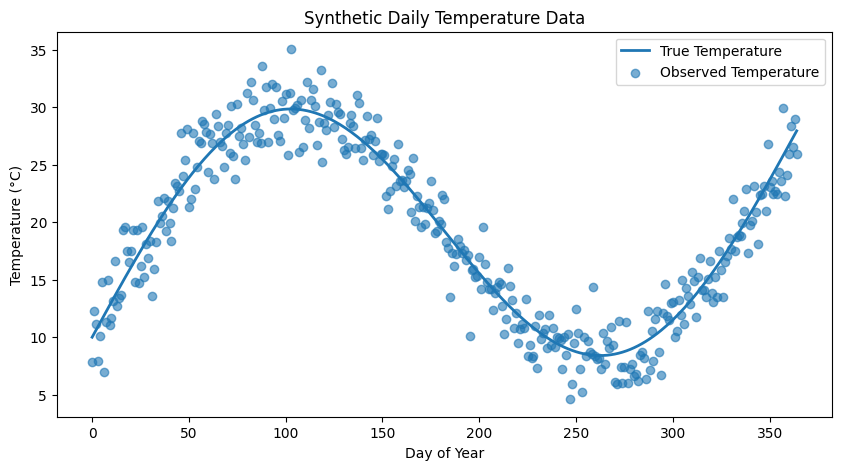

/usr/local/lib/python3.11/dist-packages/pymc/gp/gp.py:55: FutureWarning: The 'noise' parameter has been been changed to 'sigma' in order to standardize the GP API and will be deprecated in future releases.
  warnings.warn(_noise_deprecation_warning, FutureWarning)


Output()

In [ ]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az

# Seed for reproducibility
np.random.seed(123)

# ---------------------------
# 1. Generate Synthetic Data
# ---------------------------
# We simulate daily temperatures over a year (365 days).
# The true temperature has a seasonal sinusoidal variation plus a slight trend.
days = np.arange(0, 365)  # day indices
true_temperature = 10 + 15 * np.sin(2 * np.pi * days / 365) + 0.05 * days  # baseline + seasonal + trend
# Observations with Gaussian noise (measurement error)
observed_temperature = true_temperature + np.random.normal(0, 2, size=days.shape)

# Plot the synthetic data
plt.figure(figsize=(10, 5))
plt.plot(days, true_temperature, label="True Temperature", lw=2)
plt.scatter(days, observed_temperature, color="tab:blue", alpha=0.6, label="Observed Temperature")
plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.title("Synthetic Daily Temperature Data")
plt.show()

# ------------------------------------------------
# 2. Build the Gaussian Process Regression Model
# ------------------------------------------------
with pm.Model() as gp_model:
    # --- Kernel for the overall trend (smooth variations) ---
    ls_trend = pm.Gamma("ls_trend", alpha=2, beta=1)   # length-scale for trend component
    amp_trend = pm.HalfNormal("amp_trend", sigma=10)     # amplitude for trend
    cov_trend = amp_trend**2 * pm.gp.cov.ExpQuad(1, ls_trend)

    # --- Kernel for the seasonal (periodic) effect ---
    period = 365.0  # Period of one year
    ls_periodic = pm.Gamma("ls_periodic", alpha=2, beta=1)
    amp_periodic = pm.HalfNormal("amp_periodic", sigma=10)
    cov_periodic = amp_periodic**2 * pm.gp.cov.Periodic(1, ls_periodic, period)

    # --- Combined kernel: additive model of trend and periodic effects ---
    cov = cov_trend + cov_periodic

    # Define the Gaussian Process with the combined covariance function
    gp = pm.gp.Marginal(cov_func=cov)

    # Noise standard deviation for the observations
    sigma = pm.HalfNormal("sigma", sigma=2)

    # Marginal likelihood for the observations
    y_ = gp.marginal_likelihood("y", X=days[:, None], y=observed_temperature, noise=sigma)

    # Sample from the posterior
    trace = pm.sample(1500, tune=1500, target_accept=0.9, random_seed=123)

# ---------------------------
# 3. Posterior Predictions
# ---------------------------
# Generate a grid of days for prediction (covering the whole year)
days_new = np.linspace(0, 364, 365)[:, None]

with gp_model:
    # Compute the posterior predictive mean and variance
    pred_mean, pred_var = gp.predict(days_new, point=pm.summary(trace).loc[:, "mean"].to_dict(), diag=True)
    pred_std = np.sqrt(pred_var)

# ---------------------------
# 4. Plot the Results
# ---------------------------
plt.figure(figsize=(12, 6))
plt.plot(days, observed_temperature, "o", ms=4, alpha=0.5, label="Observed Data")
plt.plot(days_new, pred_mean, "r", lw=2, label="GP Posterior Mean")
plt.fill_between(days_new.flatten(),
                 pred_mean - 2 * pred_std,
                 pred_mean + 2 * pred_std,
                 color="r", alpha=0.3, label="95% Credible Interval")
plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.title("Gaussian Process Regression on Synthetic Daily Temperature Data")
plt.legend()
plt.show()

# ---------------------------
# 5. Summary of the Inference
# ---------------------------
print(az.summary(trace, var_names=["ls_trend", "amp_trend", "ls_periodic", "amp_periodic", "sigma"]))


### **Q3: more VI/ELBO**

Repurpose PyMC documentation to provide a demonstration of a neural network fit with variational inference for a different dataset context than the PyMC examples.

#### **Solution**

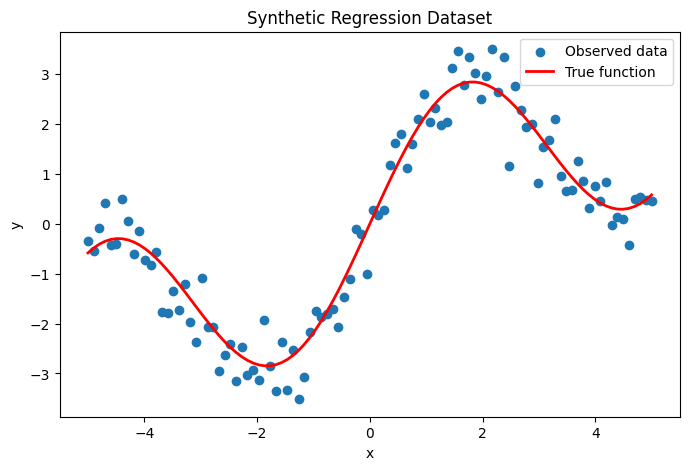

In [ ]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az

# ---------------------------
# 1. Generate Synthetic Data
# ---------------------------
# We create a regression dataset where:
#   y = 2*sin(x) + 0.5*x + noise
# This could mimic a physical process with both periodic behavior and a trend.
np.random.seed(42)
x = np.linspace(-5, 5, 100)  # 100 data points in the range [-5, 5]
y_true = 2 * np.sin(x) + 0.5 * x
noise = np.random.normal(0, 0.5, size=x.shape)
y = y_true + noise

# Plot the synthetic data
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Observed data", color="tab:blue")
plt.plot(x, y_true, label="True function", color="red", lw=2)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Synthetic Regression Dataset")
plt.show()

# ----------------------------------------------------------
# 2. Define a Bayesian Neural Network with Variational Inference
# ----------------------------------------------------------
# We build a simple neural network with one hidden layer.
# The weights and biases have standard normal priors.
# The hidden layer uses a tanh activation.
# We use ADVI to approximate the posterior.
with pm.Model() as nn_model:

    # Neural network architecture:
    # Input layer (1 neuron) -> Hidden layer (20 neurons) -> Output layer (1 neuron)
    n_hidden = 20  # Number of hidden neurons

    # Priors for input-to-hidden weights and biases
    w_1 = pm.Normal("w_1", mu=0, sigma=1, shape=(1, n_hidden))
    b_1 = pm.Normal("b_1", mu=0, sigma=1, shape=(n_hidden,))

    # Priors for hidden-to-output weights and bias
    w_2 = pm.Normal("w_2", mu=0, sigma=1, shape=(n_hidden, 1))
    b_2 = pm.Normal("b_2", mu=0, sigma=1)

    # Neural network forward pass:
    # Reshape x to be a column vector (shape: [n_samples, 1])
    hidden_layer = pm.math.tanh(pm.math.dot(x.reshape(-1, 1), w_1) + b_1)
    output_layer = pm.math.dot(hidden_layer, w_2) + b_2

    # Likelihood: Observations are assumed to be normally distributed around the NN output.
    sigma = pm.HalfNormal("sigma", sigma=1)
    y_obs = pm.Normal("y_obs", mu=output_layer.flatten(), sigma=sigma, observed=y)

    # Use Automatic Differentiation Variational Inference (ADVI) to approximate the posterior
    approx = pm.fit(n=20000, method="advi", random_seed=42)
    trace = approx.sample(1000)

# ---------------------------
# 3. Posterior Predictions
# ---------------------------
# Using the variational posterior, we generate posterior predictive samples.
with nn_model:
    pp = pm.sample_posterior_predictive(trace, var_names=["y_obs"])

# Compute the mean and standard deviation of the predictions at each input x
y_pred_mean = np.mean(pp["y_obs"], axis=0)
y_pred_std = np.std(pp["y_obs"], axis=0)

# ---------------------------
# 4. Plot the Results
# ---------------------------
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Observed data", color="tab:blue")
plt.plot(x, y_pred_mean, color="red", lw=2, label="NN Posterior Mean")
plt.fill_between(x, y_pred_mean - 2 * y_pred_std, y_pred_mean + 2 * y_pred_std,
                 color="red", alpha=0.3, label="95% Credible Interval")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Bayesian Neural Network Regression with VI")
plt.show()

# ---------------------------
# 5. Summarize the Inference
# ---------------------------
print(az.summary(trace, var_names=["w_1", "b_1", "w_2", "b_2", "sigma"]))
